# Detecção de Anomalias em Rede
## Monitoramento de Servidores com Machine Learning

Este notebook implementa um sistema de detecção de anomalias em dados de monitoramento de CPU usando Isolation Forest.

In [2]:
# Importando bibliotecas necessárias
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

print("✓ Bibliotecas importadas com sucesso")

✓ Bibliotecas importadas com sucesso


## Preparação dos Dados

Simulando dados de monitoramento do Zabbix/CloudWatch com:
- **500 pontos de dados normais**: CPU em ~30% (comportamento esperado)
- **20 anomalias**: Picos de CPU em ~90% (comportamento anômalo)

In [3]:
# Definindo seed para reprodutibilidade
np.random.seed(42)

# Gerando dados normais (CPU em 30%)
normal_data = np.random.normal(30, 5, 500)

# Gerando anomalias (picos de 90%)
anomalies = np.random.normal(90, 2, 20)

# Combinando dados
data = np.concatenate([normal_data, anomalies]).reshape(-1, 1)

print(f"Total de amostras: {len(data)}")
print(f"Dados normais: {len(normal_data)}")
print(f"Anomalias: {len(anomalies)}")
print(f"\nEstatísticas dos dados:")
print(f"  Min: {data.min():.2f}%")
print(f"  Max: {data.max():.2f}%")
print(f"  Média: {data.mean():.2f}%")
print(f"  Desvio padrão: {data.std():.2f}%")

Total de amostras: 520
Dados normais: 500
Anomalias: 20

Estatísticas dos dados:
  Min: 13.79%
  Max: 93.82%
  Média: 32.33%
  Desvio padrão: 12.47%


## Treinamento do Modelo

Usando **Isolation Forest** para detectar anomalias:
- Contamination = 0.04 (4% dos dados esperados como anomalias)
- Método não supervisionado

In [4]:
# Treinando o modelo de Detecção de Anomalias
model = IsolationForest(contamination=0.04, random_state=42)
model.fit(data)

# Predição: -1 é anomalia, 1 é normal
predictions = model.predict(data)

# Contando resultados
n_anomalies = sum(predictions == -1)
n_normal = sum(predictions == 1)

print(f"Modelo treinado com sucesso!")
print(f"\nResultados da predição:")
print(f"  Dados normais detectados: {n_normal}")
print(f"  Anomalias detectadas: {n_anomalies}")
print(f"  Taxa de detecção de anomalias: {n_anomalies/len(anomalies)*100:.1f}%")

Modelo treinado com sucesso!

Resultados da predição:
  Dados normais detectados: 499
  Anomalias detectadas: 21
  Taxa de detecção de anomalias: 105.0%


## Visualização dos Resultados

Gráfico de dispersão mostrando:
- **Azul (1)**: Dados identificados como normais
- **Vermelho (-1)**: Anomalias detectadas

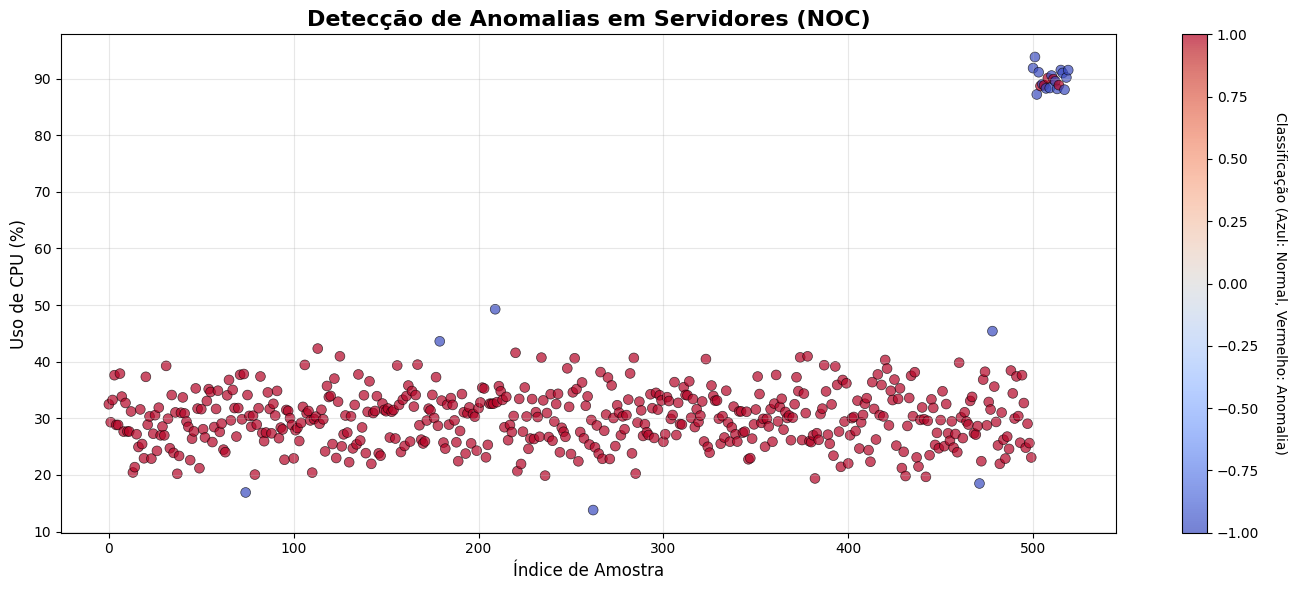

Visualização gerada com sucesso!


In [5]:
# Criando visualização
plt.figure(figsize=(14, 6))

# Plot principal
scatter = plt.scatter(range(len(data)), data, c=predictions, cmap='coolwarm', s=50, alpha=0.7, edgecolors='black', linewidth=0.5)

# Customizações
plt.title("Detecção de Anomalias em Servidores (NOC)", fontsize=16, fontweight='bold')
plt.xlabel("Índice de Amostra", fontsize=12)
plt.ylabel("Uso de CPU (%)", fontsize=12)
plt.grid(True, alpha=0.3)

# Colorbar
cbar = plt.colorbar(scatter)
cbar.set_label("Classificação (Azul: Normal, Vermelho: Anomalia)", rotation=270, labelpad=20)

plt.tight_layout()
plt.show()

print("Visualização gerada com sucesso!")

## Análise Detalhada das Anomalias

In [6]:
# Extraindo índices das anomalias
anomaly_indices = np.where(predictions == -1)[0]
anomaly_values = data[anomaly_indices].flatten()

print(f"Anomalias detectadas:")
print(f"\nÍndices: {anomaly_indices[:10]}...") if len(anomaly_indices) > 10 else print(f"\nÍndices: {anomaly_indices}")
print(f"\nValores de CPU das anomalias:")
print(f"  Min: {anomaly_values.min():.2f}%")
print(f"  Max: {anomaly_values.max():.2f}%")
print(f"  Média: {anomaly_values.mean():.2f}%")
print(f"  Mediana: {np.median(anomaly_values):.2f}%")

# Dados normais
normal_indices = np.where(predictions == 1)[0]
normal_values = data[normal_indices].flatten()

print(f"\nDados normais:")
print(f"  Min: {normal_values.min():.2f}%")
print(f"  Max: {normal_values.max():.2f}%")
print(f"  Média: {normal_values.mean():.2f}%")
print(f"  Mediana: {np.median(normal_values):.2f}%")

Anomalias detectadas:

Índices: [ 74 179 209 262 471 478 500 501 502 503]...

Valores de CPU das anomalias:
  Min: 13.79%
  Max: 93.82%
  Média: 73.22%
  Mediana: 88.34%

Dados normais:
  Min: 19.38%
  Max: 90.10%
  Média: 30.61%
  Mediana: 30.12%


## Conclusão

✅ Modelo treinado e pronto para alertas via CloudWatch/Zabbix

Este sistema pode ser integrado com:
- **CloudWatch**: Para enviar alertas automáticos
- **SNS**: Para notificações em tempo real
- **Lambda**: Para processamento automático de eventos